## 유니콘 기업 발굴하기 
### 목적: 2015년 ~ 2019년 사이의 추이를 보고 유니콘 기업으로 보이는 기업들 찾기

- 해당 데이터는 국민연금 가입 사업장 내역이라는 공개 데이터를 기반으로 함 (국민연금을 가입한 모든 기업 데이터를 통해 여러 인사이트 도출)
- 미리 진행된 데이터 전처리를 통해 기업을 식별할 수 있는 테이블 제공
- 회사의 국민연금 고지금액, 매출액, 인원수를 월별로 볼 수 있음.

### 유니콘 기업이란?
- 설립된지 **10년 이하**의 글로벌 기준 **10억달러(1조원) 이상**의 기업가치가 있는 비상장 기업 (**인수합병 및 상장기업 제외**)
    - 100억 달러(10조) 이상은 **데카콘**
    - 1000억 달러(100조)은 **헥토콘**
    - M&A나 기업공개(IPO)를 통해 자금 회수에 성공한 기업은 **엑시콘**
    - 유니콘에 성공했지만 엑시트(자금회수)에 실패한 회사는 **좀비콘**

### 한국에서 유니콘 기업이 되려면?
- 실적 보다 **투자를 유치하면서 기업가치를 높여**간다. (일반적으로 스타트업 창업 후 벤처투자를 받으면서 기업가치를 인정받는 것이 중요)
- **시리즈 A(투자금 규모 10억원), B(투자금 규모 100억원), C(투자금 규모 100억원 이상) 투자와 같이 계단식 투자**를 받아 스타트업은 기업 가치를 높여가고 나중에 다른 대기업에 매각되거나 IPO를 통해 상장 후 자금을 회수 함.
- 요즘 중소벤처기업부에서 추친하는 **K-유니콘 프로젝트**라는 제도가 있음. (유니콘 후보기업 집중발굴 및 스케일업 지원)
- **아기유니콘(기업가치 1천억원 미만) -> 예비 유니콘(기업가치 1천억원 이상 1조 미만) -> K-유니콘(기업가치 1조원 이상)**
<center>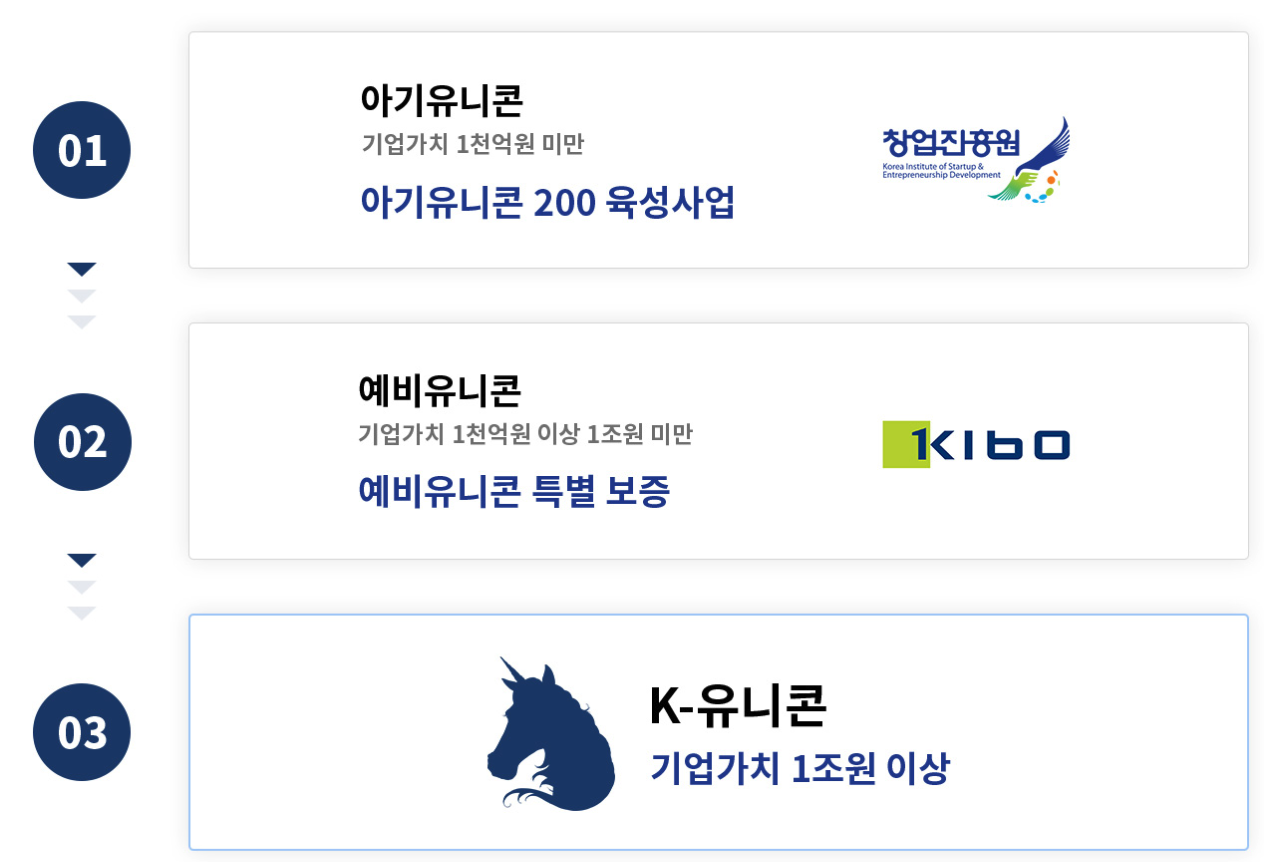</center>

### 벤처기업 or 스타트업의 가치 평가 기준
- 기업 가치에 영향을 미치는 중요한 결정요인으로는 미래현금흐름, 이지율, 주식의 수요와 공급상황, 업종 또는 기업의 인지도, CEO의 능력 및 평판 등이 있음.
- 하지만 우리가 받은 자료가 부족함.
- 평가 방법 중 정석적인 방법인 DCF 방법으로 가치평가로 하는 것이 어떨까?<center>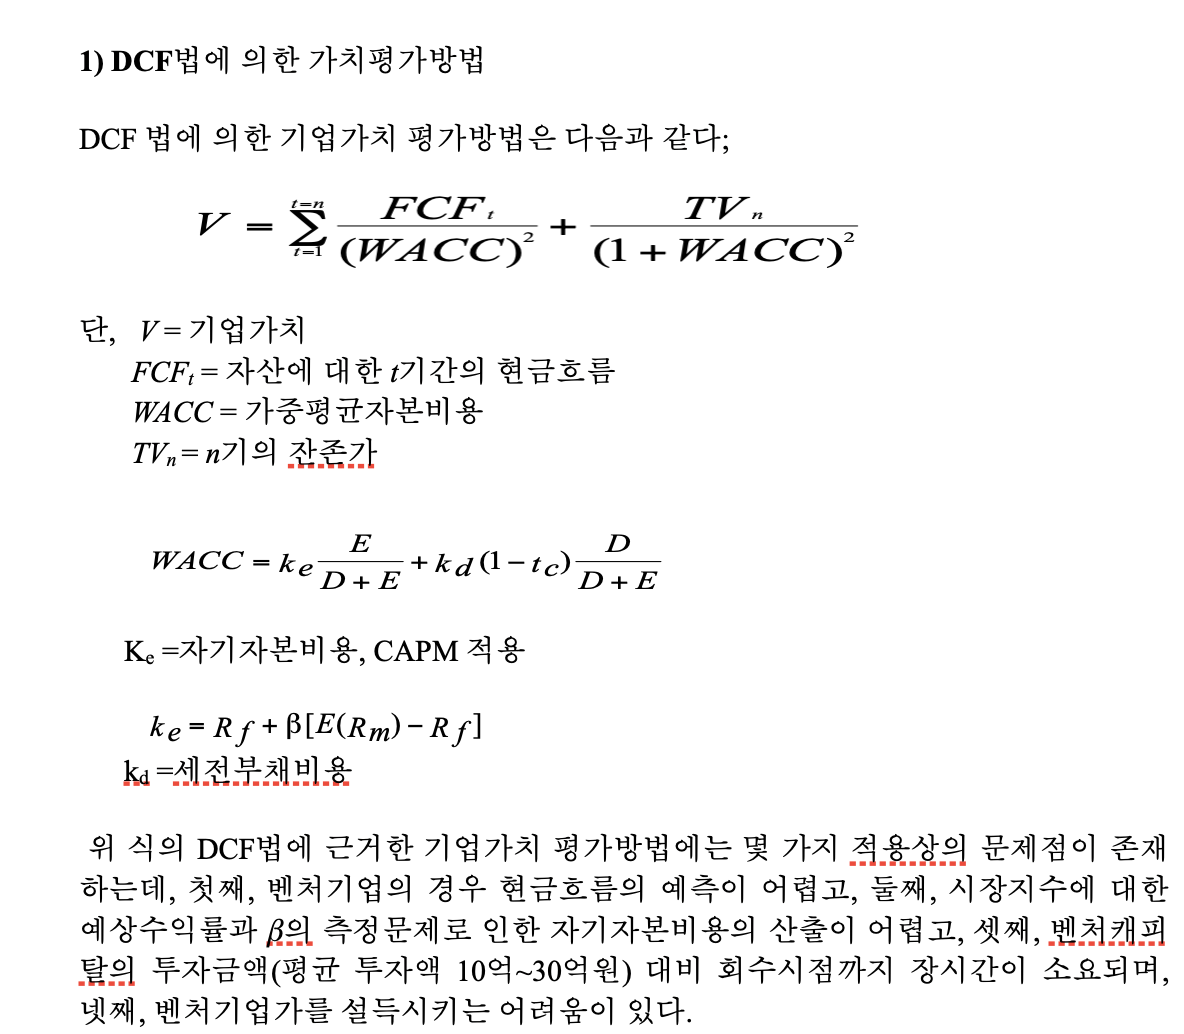</center>

In [14]:
# 패키지 불러오기 
import pandas as pd  # pandas
import numpy as np   # numpy
import matplotlib   # matplotlib
import matplotlib.pyplot as plt  # mpatplotlib.pyplot
%matplotlib inline
import matplotlib.dates as mdates #  그래프의 원하는 날짜 형식으로 포멧 셋팅 Matplotlib.dates
import matplotlib.animation as animation # 그래프 애니메이션 효과 셋팅 Matplotlib.animation
import missingno as msno # 결측치 그래프 확인 missingno 패키지


# 한글 설정 및 그래프 설정
from matplotlib import font_manager, rc   
plt.rcParams['axes.unicode_minus'] = False   # 그래프 한글 설정을 위해 matplotlib에서 rc 불러오기 (한글 깨짐 현상을 막아줌)
sns.set_style('darkgrid') # seaborn 그래프 background 회색으로 설정 
sns.set_context('talk') # 컨텍스트 매개 변수를 변경 플롯의 레이블에 대한 기본 글꼴 크기를 제어하는데 사용
sns.set(font_scale = 1)

import platform
if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~')

import plotly.express as px # plotly.express
import plotly.io as pio # plotly 라이브러리를 표기하기 위해 추가한 코드 
pio.renderers.default = "notebook_connected"

# 경고표시 무시
import warnings
warnings.filterwarnings('ignore')

In [15]:
# 데이터 불러오기
nps = pd.read_csv('data/company_nps_data.csv', encoding='cp949')
nps.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [16]:
# 데이터 크기 확인 - row: 99801, column - 6
nps.shape

(99801, 6)

In [17]:
# 데이터 타입 확인 - 모두 정수형 데이터로 구성
nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


- 확인 결과 결측치 데이터 없음

In [18]:
nps = nps[["년도", "월", "회사ID", "연매출액", "월별_연금보험료", "월별_직원수"]]
nps.head()

,년도,월,회사ID,연매출액,월별_연금보험료,월별_직원수
0,2018,7,233757,41688077,8912380,36
1,2018,3,123464,1760695,942380,5
2,2018,7,342124,3221341,781180,4
3,2015,11,386420,4815584,3795900,14
4,2018,10,129243,9799736,40724680,151


In [19]:
# 결측치 확인하기 - 결측이 없음.
for i in nps.columns:
    ab = nps[i].isnull().sum()
    if ab < 99801:
        print(i + "has {} null values.".format(ab))
        print()

년도has 0 null values.

월has 0 null values.

회사IDhas 0 null values.

연매출액has 0 null values.

월별_연금보험료has 0 null values.

월별_직원수has 0 null values.



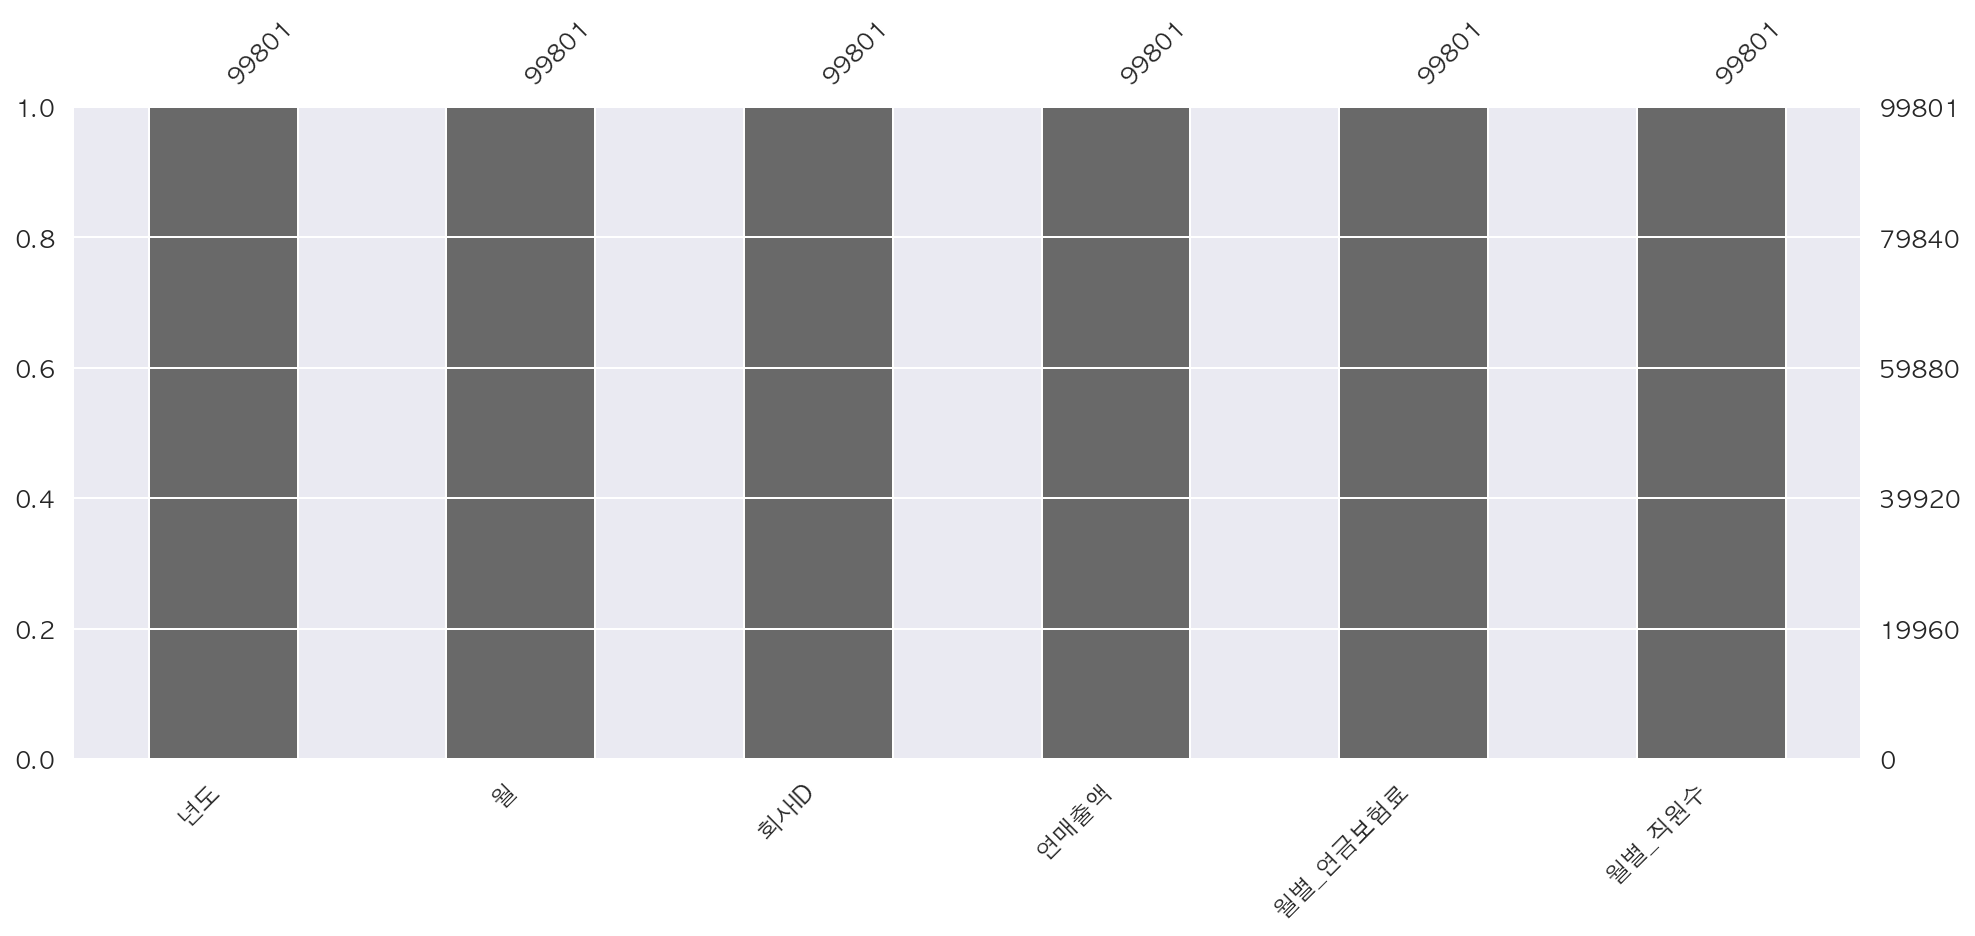

In [20]:
# 결측치 그래프로 나타내기
msno.bar(nps, fontsize=12, figsize=(16,6));

In [21]:
nps['년도'] = pd.to_datetime(nps['년도'], format="%Y", errors='raise')
nps['월'] = pd.to_datetime(nps['월'], format="%m", errors='raise')

nps['년도'] = nps['년도'].dt.year
nps['월'] =  nps['월'].dt.month

nps.sort_values(['년도', '월'], inplace=True)

nps

,년도,월,회사ID,연매출액,월별_연금보험료,월별_직원수
3,2015,11,386420,4815584,3795900,14
93,2015,11,145900,4753036,4153140,25
97,2015,11,139359,50216484,10547240,39
193,2015,11,135634,13168146,10895560,44
327,2015,11,190720,3680361,945900,4
...,...,...,...,...,...,...
92271,2019,12,478922,1746665,1557900,9
94873,2019,12,303882,19778625,4528760,18
95989,2019,12,130261,15498542,24818540,87
95991,2019,12,297682,17780858,14853280,46


In [22]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99801 entries, 3 to 96091
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   년도        99801 non-null  int64
 1   월         99801 non-null  int64
 2   회사ID      99801 non-null  int64
 3   연매출액      99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 5.3 MB


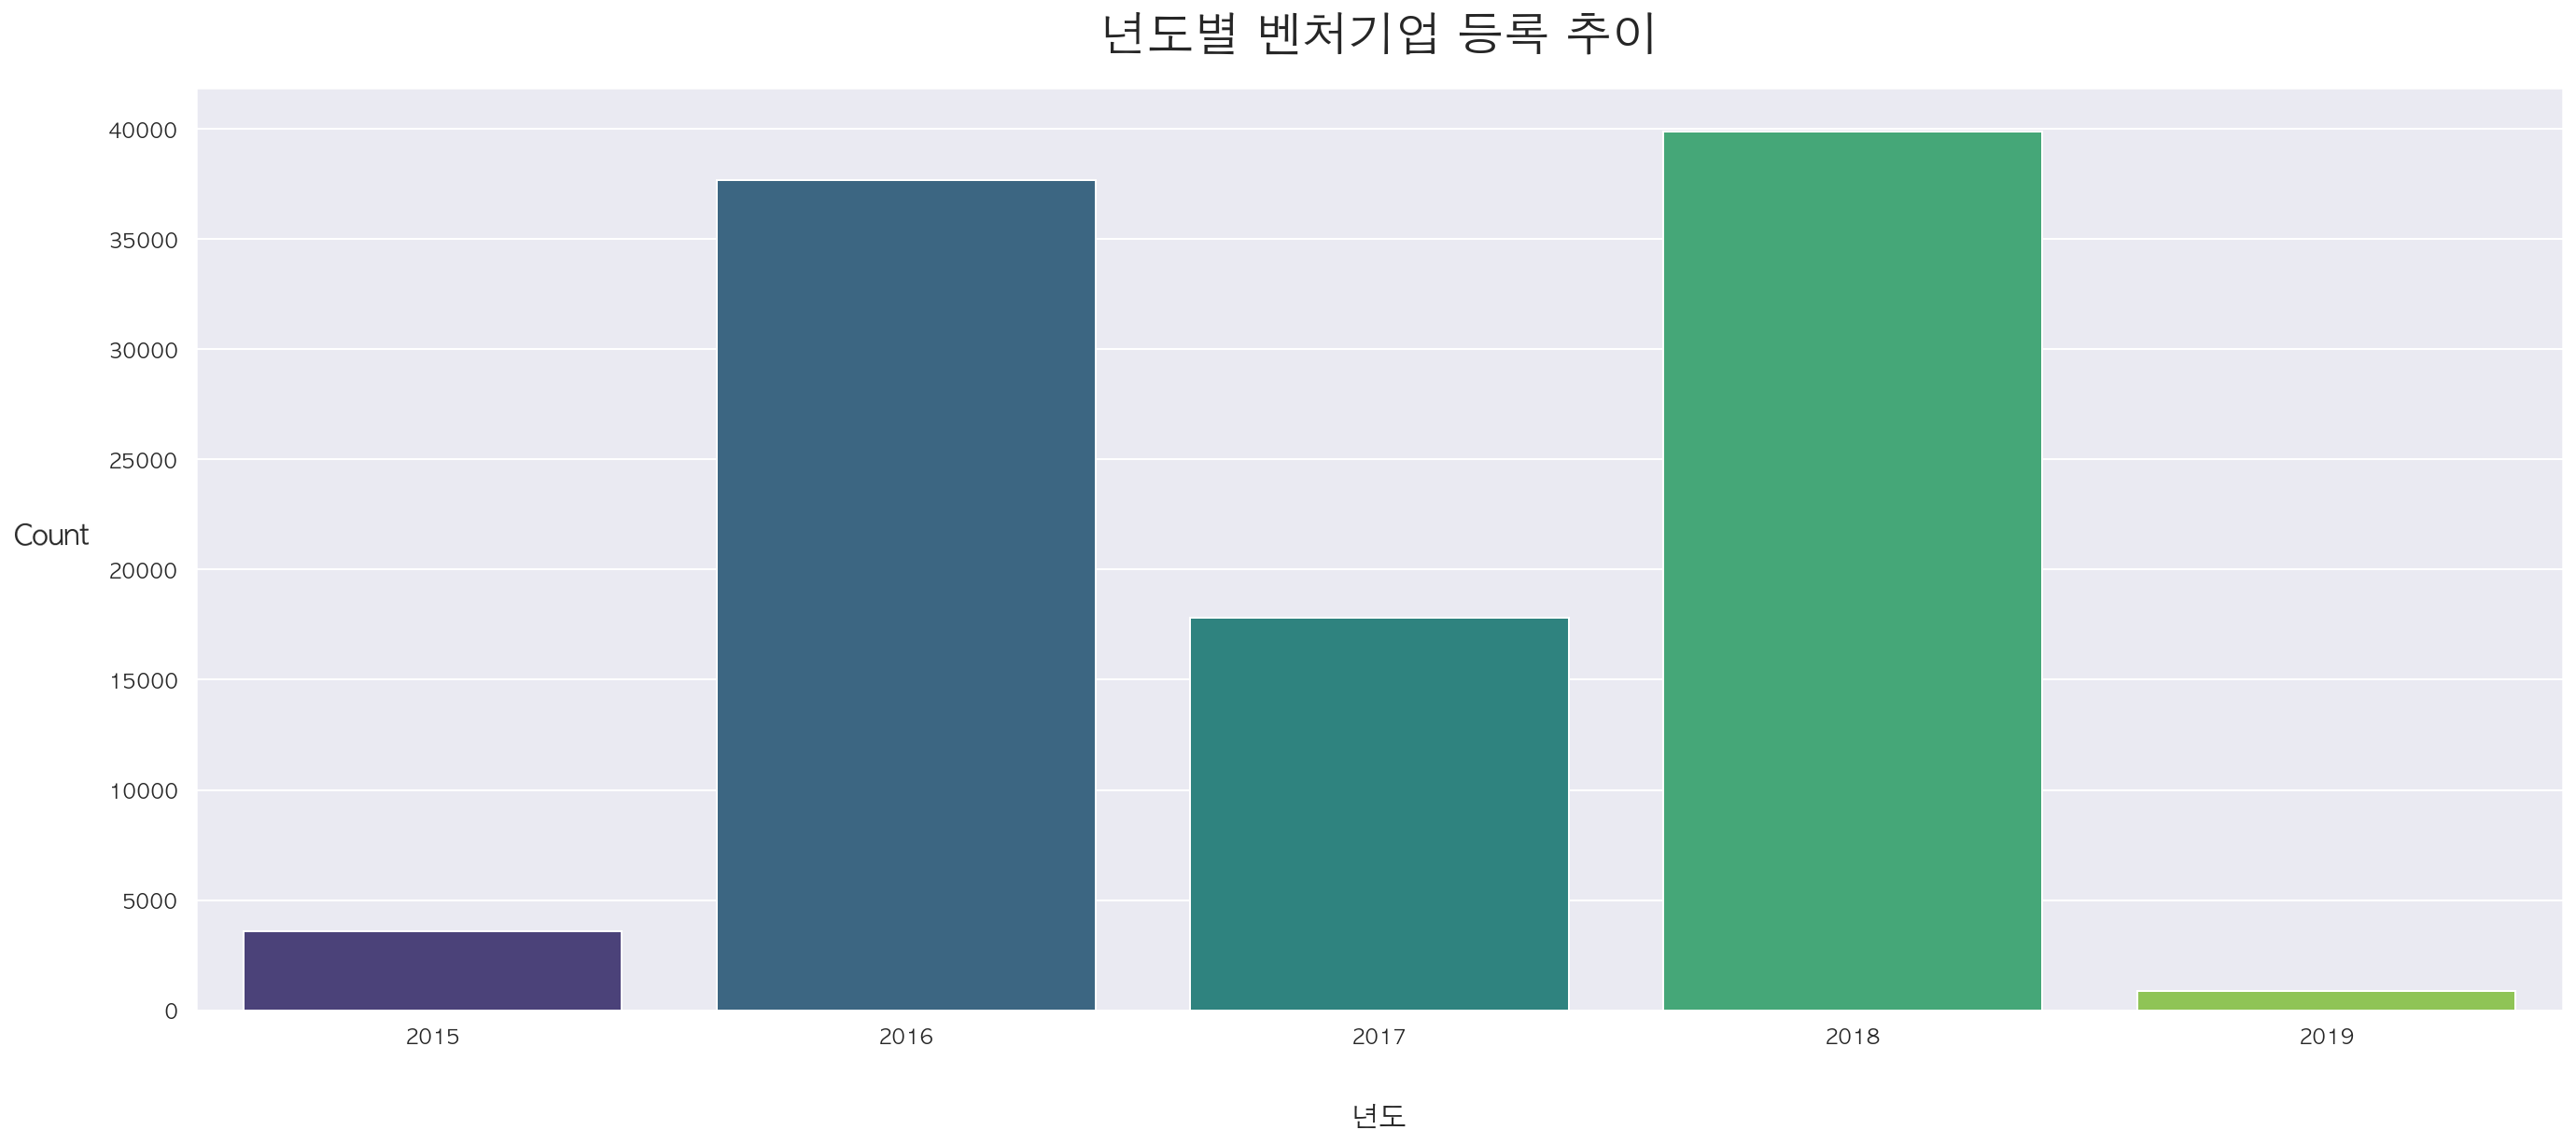

In [23]:
# 년도별 등록된 벤처기업 추이 그래프로 나타내기 
plt.figure(figsize=(50,20))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(nps['년도'].value_counts()).sort_index().T, 
            palette='viridis', ci=False)

plt.title("년도별 벤처기업 등록 추이", fontsize=25, y=1.03)
plt.xlabel('년도', fontsize=15, labelpad=30)
plt.ylabel('Count', fontsize=15, rotation=1, labelpad=30) 

plt.show()

- 각 회사 마다 언급되는 숫자가 회사를 운영한 숫자라고 판단됨 
- 예를들면 50개의 언급이 있는 회사는 2015년 11월 부터 2019년 12월 까지 
- 그래서 해당 데이터를 회사 운영 기간이라고 지정

In [25]:
nps[(nps['회사ID'] == 250472)]

,년도,월,회사ID,연매출액,월별_연금보험료,월별_직원수
47396,2015,11,250472,4270278,2053560,9
1656,2015,12,250472,4270278,2128360,9
3194,2016,1,250472,5088195,2220240,9
45996,2016,2,250472,5088195,1931620,8
71643,2016,3,250472,5088195,1931620,8
35711,2016,4,250472,5088195,2365580,10
99761,2016,5,250472,5088195,2365580,10
31469,2016,6,250472,5088195,2282420,10
93927,2016,7,250472,5088195,2283860,10
35639,2016,8,250472,5088195,2314380,10


In [26]:
nps[(nps['회사ID'] == 130756)]

,년도,월,회사ID,연매출액,월별_연금보험료,월별_직원수
52260,2015,11,130756,11278490,14891220,109
74340,2015,12,130756,11278490,13407500,98
35579,2016,1,130756,13126409,13267020,97
74620,2016,2,130756,13126409,13416960,98
14469,2016,3,130756,13126409,13171260,97
79799,2016,4,130756,13126409,12791120,95
51999,2016,5,130756,13126409,12704800,96
65432,2016,6,130756,13126409,12591400,95
16108,2016,7,130756,13126409,14219520,92
98030,2016,8,130756,13126409,14188580,94


- 회사 운영기간이 제일 두 회사를 비고해보니 **'회사ID 250472'**는 직원수가 적은데 연 매출  127억을 기록
- **'회사ID 130756'**은 직원 수는 많은데 연 매출 36억을 기록 
- 혹시 직원수 대비 매출을 기준으로 하면 유니콘 기업을 발굴 할 수 있지 않을까? 라는 생각을 함

In [31]:
# 우선 피어슨 상관관계 계산
nps.corr(method='pearson')

,년도,월,회사ID,연매출액,월별_연금보험료,월별_직원수
년도,1.000000,-0.096107,-0.033194,0.015202,0.008121,-0.002206
월,-0.096107,1.000000,0.008969,-0.001347,0.005006,0.002000
회사ID,-0.033194,0.008969,1.000000,-0.001675,-0.010393,0.007430
연매출액,0.015202,-0.001347,-0.001675,1.000000,0.729694,0.638125
월별_연금보험료,0.008121,0.005006,-0.010393,0.729694,1.000000,0.962101
월별_직원수,-0.002206,0.002000,0.007430,0.638125,0.962101,1.000000


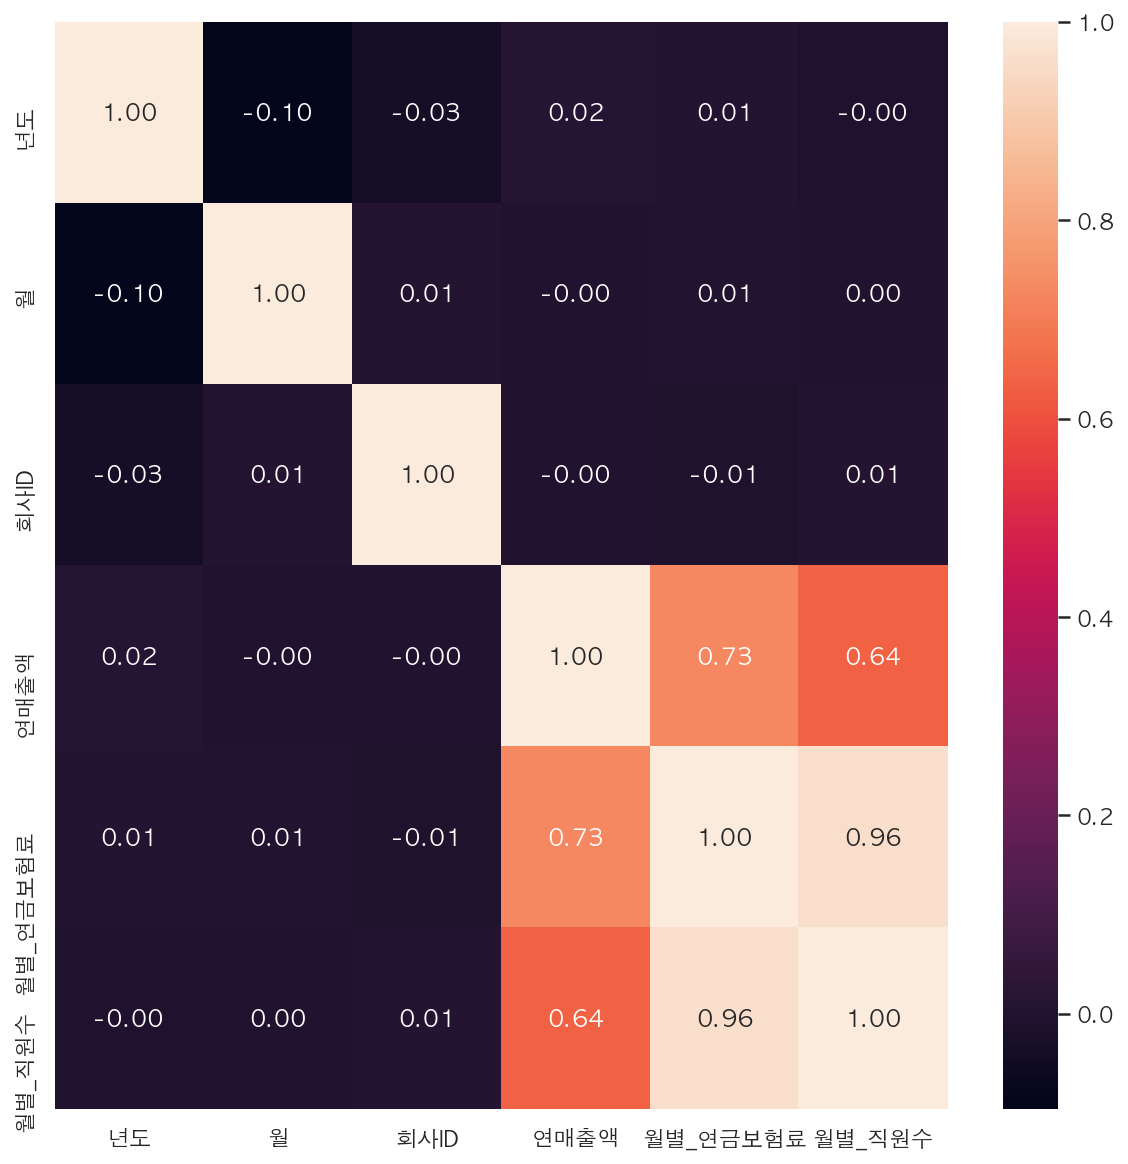

In [43]:
# 상관관계 heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data = nps.corr(), annot=True, fmt = '.2f');

- 상관관계를 살펴보니 가장 높은 상관계를 나타내는 수치는 **0.73**으로 연매출액 대비 월별_연금보험료였다. 아무래도 **매출대비 연금보혐료가 상관관계**가 높은 것을 알 수 있다.
- 내가 예상한 직원 수 대비 연 매출액의 상관관계 수치는 **0.64**로 나타났다.
- 과연 이렇게 하는 것이 맞는지 의문이 듬

- 논의할 점 
    - 1. 벤처기업 혹은 스타트업을 산정할 수 있는 가치 요소가 다른 것이 있는지 논의 
    - 2. 처음에 직원 수 대비 매출액을 기준으로 가치를 산정하려고 했으나, 상관관계가 연금보험료 대비 매출액을 기준으로 가치 산정을 하는게 상관관계가 높다고 나옴, 정말 이렇게 하는 것이 맞는 것인지 논의 
    - 3. 다른 팀원분들의 이야기를 들어보고 방향성 다시 잡아보기 